In [10]:
import pandas as pd
import numpy as np

arquivo = arquivos[0]

df = pd.read_csv(
    arquivo,
    sep=";",
    encoding="latin1",
    skiprows=3,          # pula as 3 linhas iniciais (01,02,03)
    na_values=["-", ""], # trata "-" como vazio
    quotechar='"'        # respeita aspas
)
import numpy as np

# remove a coluna de texto (Município gestor)
df_num = df.drop(columns=["Município gestor"])

# transforma tudo em um vetor 1D
populacao = df_num.to_numpy().flatten()

# remove valores ausentes
populacao = populacao[~np.isnan(populacao)]

len(populacao)

df.head()




,Município gestor,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,Total
0,110001 Alta Floresta D'Oeste,176.0,189.0,190.0,190.0,189.0,190.0,190.0,190.0,190.0,...,132.0,138.0,101.0,87.0,65.0,98.0,98.0,108.0,119.0,26841.0
1,110037 Alto Alegre dos Parecis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0,21.0,25.0,15.0,23.0,22.0,22.0,27.0,29.0,5230.0
2,110040 Alto Paraíso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,28.0,21.0,18.0,27.0,28.0,32.0,29.0,34.0,5038.0
3,110034 Alvorada D'Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.0,48.0,9.0,26.0,22.0,24.0,20.0,34.0,11.0,9773.0
4,110002 Ariquemes,438.0,359.0,359.0,378.0,462.0,441.0,387.0,320.0,361.0,...,506.0,468.0,361.0,419.0,406.0,458.0,468.0,460.0,469.0,70745.0


In [20]:
resultados_pop = {
    "Média": media_pop,
    "Variância": variancia_pop,
    "Desvio padrão": desvio_pop,
    "Mediana": mediana_pop,
    "Moda": moda_pop
}

resultados_pop
pd.DataFrame(resultados_pop, index=["População"]).round(2)





,Média,Variância,Desvio padrão,Mediana,Moda
População,2391.13,8.911685e+10,298524.46,95.0,1.0


In [22]:
pop_sem_zero = populacao[populacao > 0]


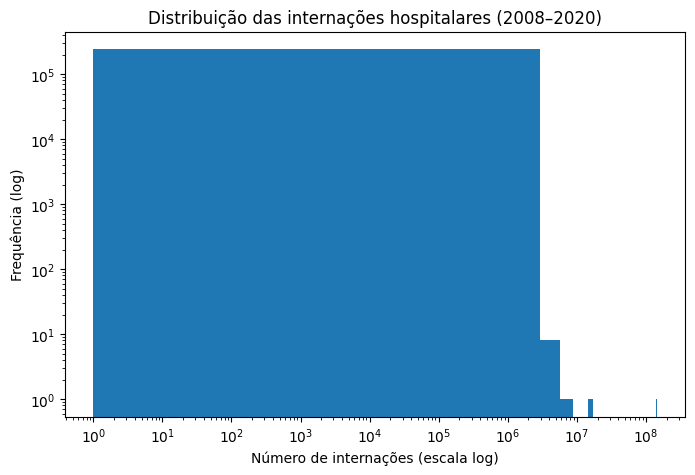

In [23]:
plt.figure(figsize=(8,5))
plt.hist(pop_sem_zero, bins=50, log=True)
plt.xscale("log")
plt.title("Distribuição das internações hospitalares (2008–2020)")
plt.xlabel("Número de internações (escala log)")
plt.ylabel("Frequência (log)")
plt.show()


In [25]:
N = len(populacao) ## mostrar qual o tamanho da população
N


242603

In [27]:
import numpy as np

N = len(populacao)

n1  = int(N * 0.01)
n5  = int(N * 0.05)
n10 = int(N * 0.10)

amostra_1  = np.random.choice(populacao, size=n1,  replace=False)
amostra_5  = np.random.choice(populacao, size=n5,  replace=False)
amostra_10 = np.random.choice(populacao, size=n10, replace=False)

len(amostra_1), len(amostra_5), len(amostra_10)


(2426, 12130, 24260)

In [28]:
def estatisticas(v):
    return {
        "Média": np.mean(v),
        "Variância": np.var(v),
        "Desvio padrão": np.std(v),
        "Mediana": np.median(v),
        "Moda": pd.Series(v).mode().iloc[0]
    }

stats_1  = estatisticas(amostra_1)
stats_5  = estatisticas(amostra_5)
stats_10 = estatisticas(amostra_10)

df_amostras = pd.DataFrame([stats_1, stats_5, stats_10],
                           index=["Amostra 1%", "Amostra 5%", "Amostra 10%"])

df_amostras


,Média,Variância,Desvio padrão,Mediana,Moda
Amostra 1%,674.667766,1.443666e+07,3799.560164,97.0,2.0
Amostra 5%,1212.948063,4.346527e+08,20848.325526,92.0,1.0
Amostra 10%,1485.894147,7.854425e+08,28025.747040,94.5,1.0


In [29]:
df_pop = pd.DataFrame(resultados_pop, index=["População"])

df_comparacao = pd.concat([df_pop, df_amostras])

df_comparacao
# Compara as medidas estatísticas da população com amostras de 1%, 5% e 10%, analisando a aproximação dos estimadores amostrais aos valores populacionais.



,Média,Variância,Desvio padrão,Mediana,Moda
População,2391.130217,8.911685e+10,298524.455240,95.0,1.0
Amostra 1%,674.667766,1.443666e+07,3799.560164,97.0,2.0
Amostra 5%,1212.948063,4.346527e+08,20848.325526,92.0,1.0
Amostra 10%,1485.894147,7.854425e+08,28025.747040,94.5,1.0


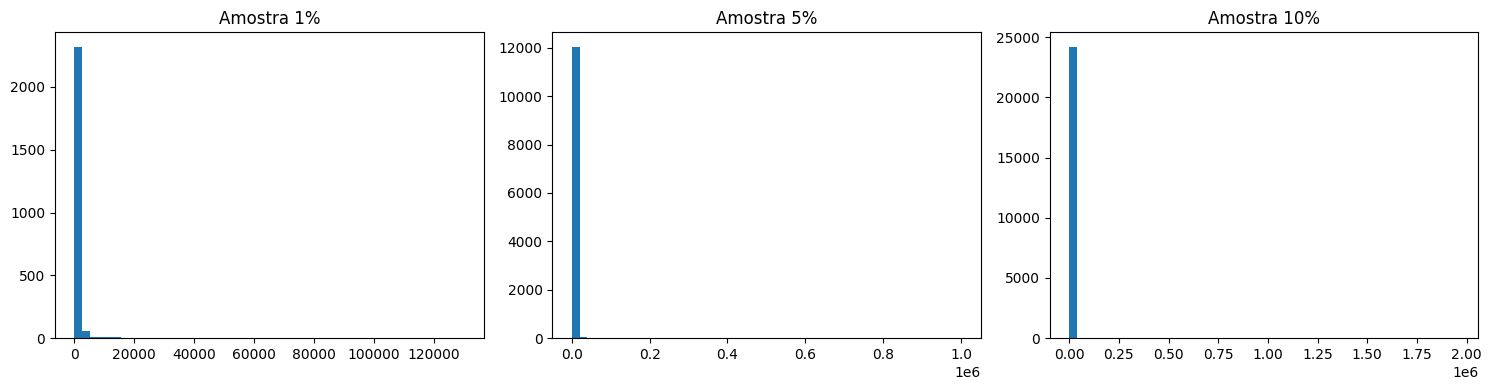

In [30]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(amostra_1, bins=50)
plt.title("Amostra 1%")

plt.subplot(1,3,2)
plt.hist(amostra_5, bins=50)
plt.title("Amostra 5%")

plt.subplot(1,3,3)
plt.hist(amostra_10, bins=50)
plt.title("Amostra 10%")

plt.tight_layout()
plt.show()


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# população (já existe no seu notebook)
N = len(populacao)
n = int(0.01 * N)  # tamanho fixo: 1% da população
B = 100            # número de amostras

N, n, B


(242603, 2426, 100)

In [33]:
# listas para guardar estatísticas de cada amostra
medias = np.empty(B)
variancias = np.empty(B)
desvios = np.empty(B)
somas = np.empty(B)

# para reprodutibilidade
rng = np.random.default_rng(42)

for i in range(B):
    amostra = rng.choice(populacao, size=n, replace=False)
    medias[i] = np.mean(amostra)
    variancias[i] = np.var(amostra, ddof=1)   # variância amostral
    desvios[i] = np.std(amostra, ddof=1)      # desvio padrão amostral
    somas[i] = np.sum(amostra)

df_100 = pd.DataFrame({
    "amostra": np.arange(1, B+1),
    "media": medias,
    "variancia": variancias,
    "dp": desvios,
    "soma": somas
})


df_100.head()



,amostra,media,variancia,dp,soma
0,1,1387.379637,5.088392e+08,22557.464811,3365783.0
1,2,781.816570,1.290404e+07,3592.220048,1896687.0
2,3,1007.361500,3.068880e+08,17518.217671,2443859.0
3,4,8367.589448,9.019933e+10,300332.040606,20299772.0
4,5,1178.479390,4.257440e+08,20633.564415,2858991.0


In [34]:
# parâmetros populacionais (use ddof=0 para população)
media_pop = np.mean(populacao)
variancia_pop = np.var(populacao, ddof=0)
desvio_pop = np.std(populacao, ddof=0)

ks = [1, 5, 10, 20, 50, 100]

tabela_esperanca = []
for k in ks:
    tabela_esperanca.append({
        "qtd_amostras": k,
        "E[média_amostral]": np.mean(medias[:k]),
        "E[variância_amostral]": np.mean(variancias[:k]),
        "E[dp_amostral]": np.mean(desvios[:k]),
        "média_pop": media_pop,
        "variância_pop": variancia_pop,
        "dp_pop": desvio_pop
    })

df_esperanca = pd.DataFrame(tabela_esperanca)
df_esperanca


,qtd_amostras,E[média_amostral],E[variância_amostral],E[dp_amostral],média_pop,variância_pop,dp_pop
0,1,1387.379637,5.088392e+08,22557.464811,2391.130217,8.911685e+10,298524.45524
1,5,2544.525309,1.829074e+10,72926.701510,2391.130217,8.911685e+10,298524.45524
2,10,1979.122053,9.782360e+09,51081.150366,2391.130217,8.911685e+10,298524.45524
3,20,1781.234893,5.385867e+09,39719.509140,2391.130217,8.911685e+10,298524.45524
4,50,1662.465441,2.814290e+09,32161.072787,2391.130217,8.911685e+10,298524.45524
5,100,1621.881397,2.092972e+09,30232.413420,2391.130217,8.911685e+10,298524.45524


In [35]:
media_somas = np.mean(somas)
var_somas = np.var(somas, ddof=1)
dp_somas = np.std(somas, ddof=1)

# comparações "teóricas aproximadas"
aprox_media_somas = n * media_pop
aprox_var_somas = n * variancia_pop
aprox_dp_somas = np.sqrt(n) * desvio_pop

pd.DataFrame({
    "Medida": ["Média da soma", "Variância da soma", "DP da soma"],
    "Estimado (100 amostras)": [media_somas, var_somas, dp_somas],
    "Aproximação teórica": [aprox_media_somas, aprox_var_somas, aprox_dp_somas]
})


,Medida,Estimado (100 amostras),Aproximação teórica
0,Média da soma,3.934684e+06,5.800882e+06
1,Variância da soma,5.773260e+12,2.161975e+14
2,DP da soma,2.402761e+06,1.470366e+07


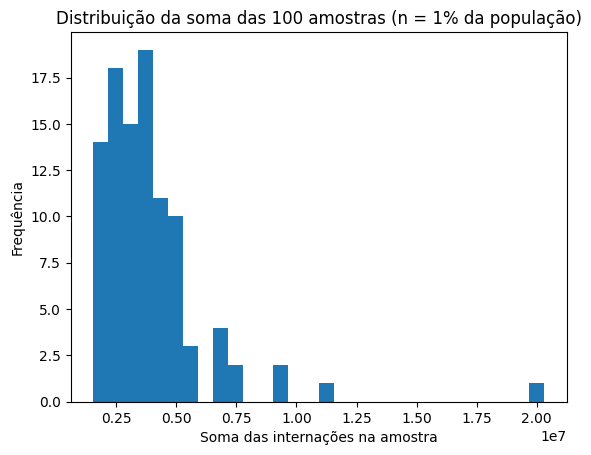

In [36]:
plt.figure()
plt.hist(somas, bins=30)
plt.title("Distribuição da soma das 100 amostras (n = 1% da população)")
plt.xlabel("Soma das internações na amostra")
plt.ylabel("Frequência")
plt.show()


In [39]:
from scipy.stats import t
z = t.ppf(0.975, df=n-1)


# limites do IC para cada amostra
ic_inf = medias - z * (desvios / np.sqrt(n))
ic_sup = medias + z * (desvios / np.sqrt(n))

# 1) média amostral está dentro do próprio IC? (sempre estará)
dentro_media_amostral = np.sum((medias >= ic_inf) & (medias <= ic_sup))

# 2) IC contém a média populacional?
contém_media_pop = (media_pop >= ic_inf) & (media_pop <= ic_sup)
qtd_contém_media_pop = np.sum(contém_media_pop)

dentro_media_amostral, qtd_contém_media_pop


(np.int64(100), np.int64(52))

In [41]:
pd.DataFrame({
    "N_população": [N],
    "n (1% da população)": [n],
    "n_amostras": [B],
    "Nível de confiança": ["95%"],
    "ICs que contêm a média populacional": [int(qtd_contém_media_pop)],
    "Proporção": [qtd_contém_media_pop / B]
    # Resultado final do experimento: proporção de ICs que contêm a média populacional para 100 amostras (n = 1% da população)

})


,N_população,n (1% da população),n_amostras,Nível de confiança,ICs que contêm a média populacional,Proporção
0,242603,2426,100,95%,52,0.52
